In [1]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error

In [2]:
#!pip3 install --upgrade statsmodels --user

In [3]:
genos = np.loadtxt("PS2_Q3_data/gwas.geno")
phenos = np.loadtxt("PS2_Q3_data/gwas.pheno")

In [4]:
genos.shape

(500, 382)

In [5]:
phenos.shape

(500, 4)

In [6]:
'''
#extract p-value for specific predictor variable name
model.pvalues.loc['predictor1']

#extract p-value for specific predictor variable position
model.pvalues[0]
'''

"\n#extract p-value for specific predictor variable name\nmodel.pvalues.loc['predictor1']\n\n#extract p-value for specific predictor variable position\nmodel.pvalues[0]\n"

In [7]:
y = phenos[:,0]
x = genos[:,0]

x = sm.add_constant(x)

mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.869
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.172
Time:                        23:10:11   Log-Likelihood:                -698.32
No. Observations:                 500   AIC:                             1401.
Df Residuals:                     498   BIC:                             1409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0570      0.050      1.150      0.2

In [8]:
print(x.shape)

(500, 2)


In [9]:
n_pheno = phenos.shape[1]
n_snp = genos.shape[1]
n_individual = phenos.shape[0]
p_value_matrix = np.zeros((n_snp,n_pheno))
for i in range(n_snp):
    for j in range(n_pheno):
        
        x = genos[:,i]
        y = phenos[:,j]
        
        x = sm.add_constant(x)

        mod = sm.OLS(y,x)
        res = mod.fit()
        p_value_matrix[i,j] = res.pvalues[1]

In [10]:
'''
For which SNPs and phenotypes, can we reject the null hypothesis of no association at the
chosen signficance level ?
'''

'\nFor which SNPs and phenotypes, can we reject the null hypothesis of no association at the\nchosen signficance level ?\n'

In [11]:
threshold = 0.05/n_snp
test_reject_idx = np.where( p_value_matrix <= threshold)

In [12]:
test_reject_idx

(array([ 42, 118, 257], dtype=int64), array([3, 2, 1], dtype=int64))

In [13]:
# ADD 1 to index since SNPs start from 1
#42 SNP at pheno 3
#118 SNP at pheno 2
#257 SNP at pheno 1

In [14]:
for i in range(n_pheno):
    p_values = p_value_matrix[:,i]
    statistic, p_value = stats.kstest(p_values, 'uniform')

    # Set your significance level (alpha)
    alpha = 0.05

    # Check if p-value is less than alpha
    if p_value < alpha:
        print("The p-values are not uniformly distributed (reject the null hypothesis).")
    else:
        print("The p-values appear to be uniformly distributed (fail to reject the null hypothesis).")
    

The p-values appear to be uniformly distributed (fail to reject the null hypothesis).
The p-values appear to be uniformly distributed (fail to reject the null hypothesis).
The p-values appear to be uniformly distributed (fail to reject the null hypothesis).
The p-values are not uniformly distributed (reject the null hypothesis).


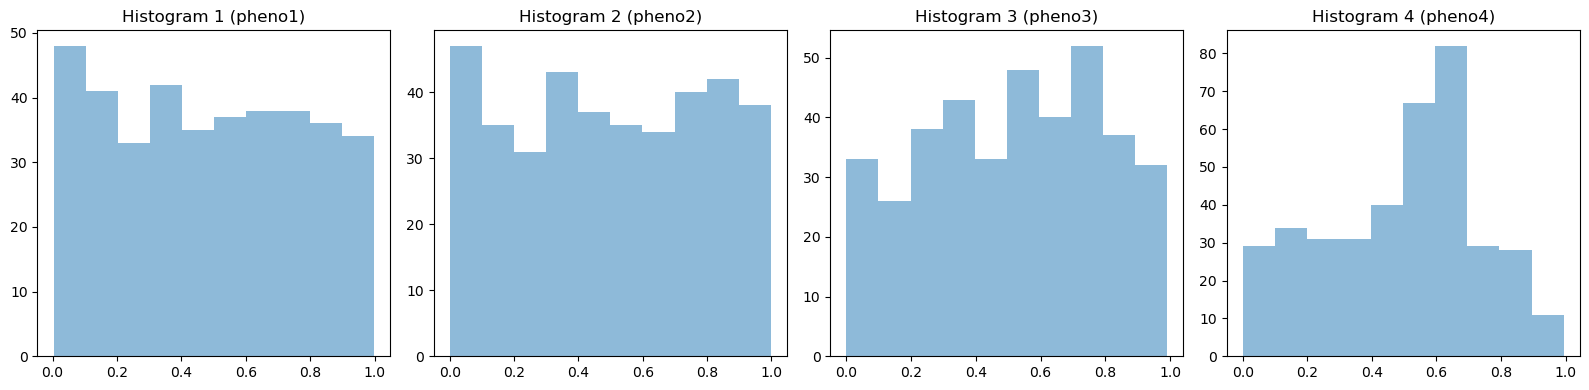

In [15]:
# Create subplots for four histograms
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Labels for the distributions
labels = ['pheno1', 'pheno2', 'pheno3', 'pheno4']

for i in range(4):
    p_values = p_value_matrix[:,i]
    axs[i].hist(p_values, bins=10, alpha=0.5)
    axs[i].set_title(f'Histogram {i+1} ({labels[i]})')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

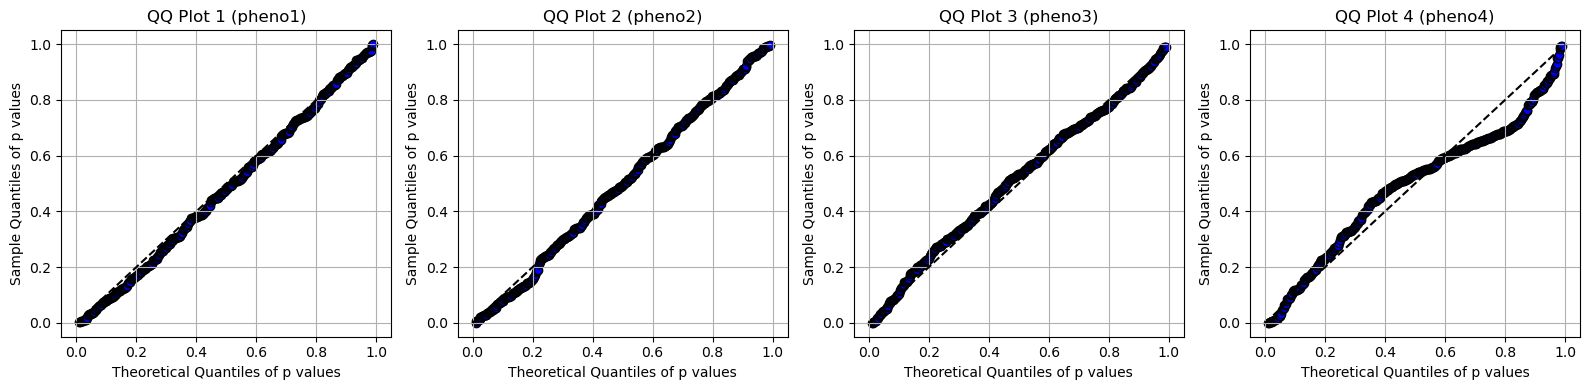

In [37]:
# Create subplots for four histograms
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Labels for the distributions
labels = ['pheno1', 'pheno2', 'pheno3', 'pheno4']

theoretical_quantiles = stats.uniform.ppf(np.linspace(0.01, 0.99, p_value_matrix.shape[0]))

for i in range(4):
    p_values = p_value_matrix[:,i]
    sorted_p = np.sort(p_values)
    axs[i].scatter(theoretical_quantiles, sorted_p, c='b', marker='o', edgecolors='k')
    axs[i].plot([0, 1], [0, 1], 'k--')
    axs[i].set_title(f'QQ Plot {i+1} ({labels[i]})')
    axs[i].set_xlabel('Theoretical Quantiles of p values')
    axs[i].set_ylabel('Sample Quantiles of p values')
    axs[i].grid(True)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# ADD 1 to index since SNPs start from 1
#42 SNP at pheno 3
#118 SNP at pheno 2
#257 SNP at pheno 1

In [38]:
idx = [[42,3],[118,2],[257,1]]

In [39]:
len(idx)

3

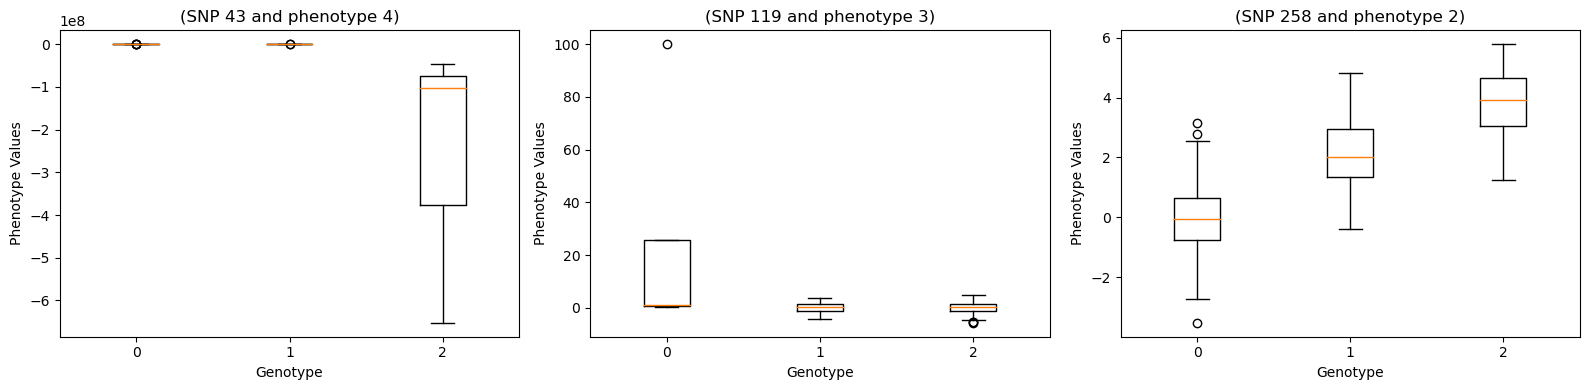

In [42]:
# Create a box plot
idx = [[42,3],[118,2],[257,1]]
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

labels = ['SNP 43 and phenotype 4', 'SNP 119 and phenotype 3', 'SNP 258 and phenotype 2']
for i in range(len(idx)):
    idx_select = idx[i]
    associated_SNP = genos[:,idx_select[0]]
    associated_pheno = phenos[:,idx_select[1]]
    data = [associated_pheno[np.where(associated_SNP == 0)],associated_pheno[np.where(associated_SNP == 1)],associated_pheno[np.where(associated_SNP == 2)]]
    axs[i].boxplot(data)
    axs[i].set_title(f'({labels[i]})')
    axs[i].set_xticks([1, 2, 3], ['0', '1', '2'])
    axs[i].set_xlabel('Genotype')
    axs[i].set_ylabel('Phenotype Values')
    
plt.tight_layout()
plt.show()

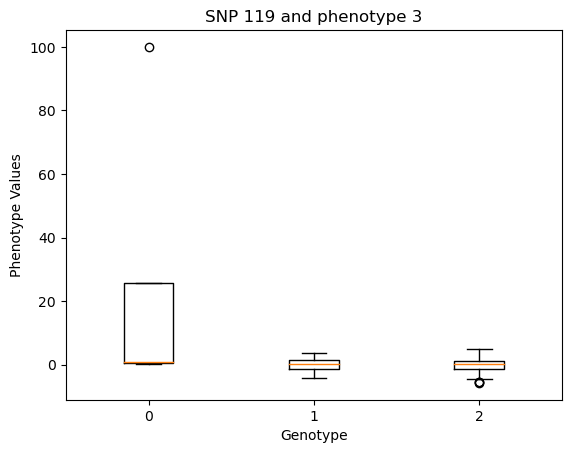

In [18]:
associated_SNP = genos[:,118]
associated_pheno = phenos[:,2]
data = [associated_pheno[np.where(associated_SNP == 0)],associated_pheno[np.where(associated_SNP == 1)],associated_pheno[np.where(associated_SNP == 2)]]
plt.boxplot(data)

# Set labels for the x-axis (optional)
plt.xticks([1, 2, 3], ['0', '1', '2'])

# Add a title and labels
plt.title('')
plt.xlabel('Genotype')
plt.ylabel('Phenotype Values')

# Show the plot
plt.show()

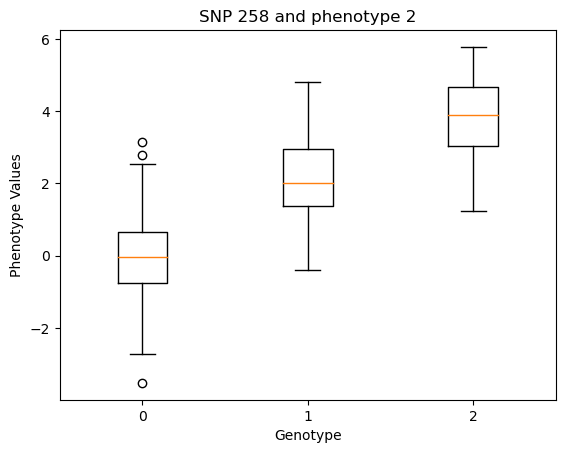

In [19]:
associated_SNP = genos[:,257]
associated_pheno = phenos[:,1]
data = [associated_pheno[np.where(associated_SNP == 0)],associated_pheno[np.where(associated_SNP == 1)],associated_pheno[np.where(associated_SNP == 2)]]
plt.boxplot(data)

# Set labels for the x-axis (optional)
plt.xticks([1, 2, 3], ['0', '1', '2'])

# Add a title and labels
plt.title('')
plt.xlabel('Genotype')
plt.ylabel('Phenotype Values')

# Show the plot
plt.show()

In [20]:
#Q4
train_genos = np.loadtxt("PS2_Q4_data/ridge.training.geno")
train_phenos = np.loadtxt("PS2_Q4_data/ridge.training.pheno")
test_genos = np.loadtxt("PS2_Q4_data/ridge.test.geno")
test_phenos = np.loadtxt("PS2_Q4_data/ridge.test.pheno")

In [21]:
print(train_genos.shape)
print(train_phenos.shape)
print(test_genos.shape)
print(test_phenos.shape)

(900, 1000)
(900,)
(100, 1000)
(100,)


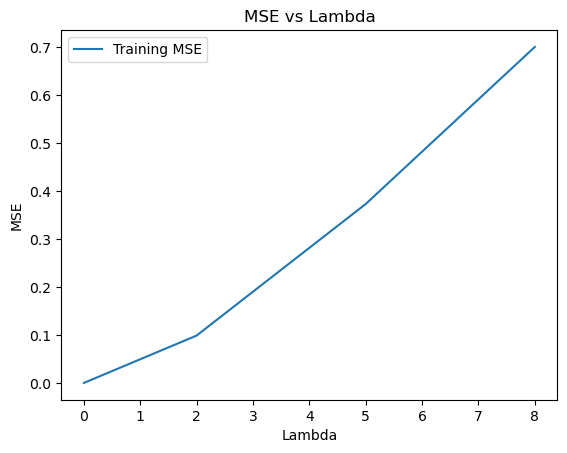

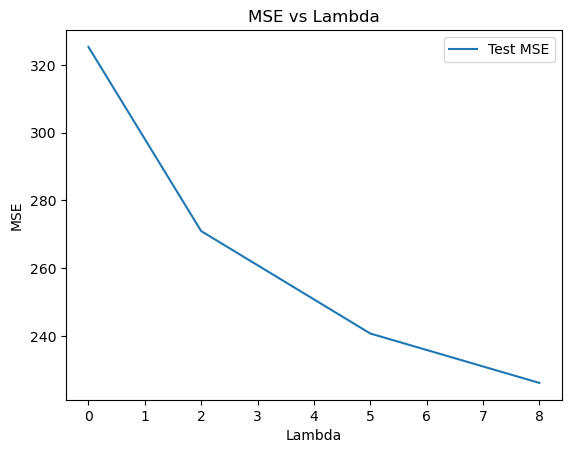

In [22]:
lambdas = [0.001,2,5,8]
pred_phenos_test_list = []
mse_list_test= []
pred_phenos_train_list = []
mse_list_train = []
for lambda_val in lambdas:
    y = train_phenos.copy()
    x = train_genos.copy()
    #x = sm.add_constant(X)
    
    betas = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x) + lambda_val * np.identity(x.shape[1])),x.T),y.reshape(-1,1))
    
    x_test = test_genos.copy()
    #x_test = sm.add_constant(X_test)
    
    pred_phenos_train = np.matmul(x,betas)
    pred_phenos_train_list.append(pred_phenos_train)
    pred_phenos_test = np.matmul(x_test,betas)
    pred_phenos_test_list.append(pred_phenos_test)
    
    mse_train = mean_squared_error(train_phenos, pred_phenos_train)
    mse_test = mean_squared_error(test_phenos, pred_phenos_test)
    
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)

plt.figure()
plt.plot(lambdas, mse_list_train, label='Training MSE')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

plt.figure()
plt.plot(lambdas, mse_list_test, label='Test MSE')    
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

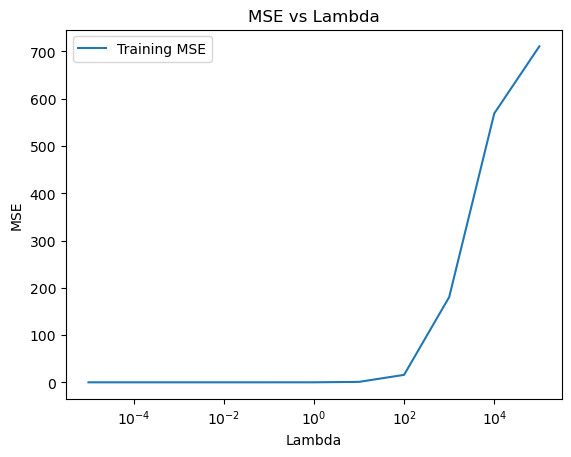

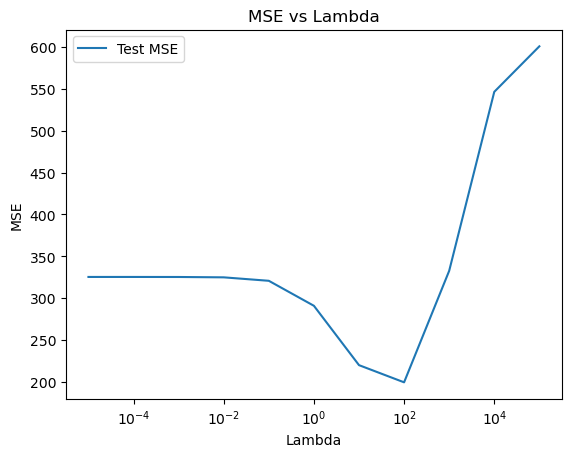

In [23]:
lambdas = list(np.logspace(-5, 5, num=11))
pred_phenos_test_list = []
mse_list_test= []
pred_phenos_train_list = []
mse_list_train = []
for lambda_val in lambdas:
    y = train_phenos.copy()
    x = train_genos.copy()
    #x = sm.add_constant(X)
    
    betas = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x) + lambda_val * np.identity(x.shape[1])),x.T),y.reshape(-1,1))
    
    x_test = test_genos.copy()
    #x_test = sm.add_constant(X_test)
    
    pred_phenos_train = np.matmul(x,betas)
    pred_phenos_train_list.append(pred_phenos_train)
    pred_phenos_test = np.matmul(x_test,betas)
    pred_phenos_test_list.append(pred_phenos_test)
    
    mse_train = mean_squared_error(train_phenos, pred_phenos_train)
    mse_test = mean_squared_error(test_phenos, pred_phenos_test)
    
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)

plt.figure()
plt.semilogx(lambdas, mse_list_train, label='Training MSE')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

plt.figure()
plt.semilogx(lambdas, mse_list_test, label='Test MSE')    
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

In [24]:
'''
lambdas = list(np.logspace(-5, 5, num=11))#[0,0.001,2,5,8]
#lambdas = [0.001,2,5,8]
pred_phenos_test_list = []
mse_list_test= []
pred_phenos_train_list = []
mse_list_train = []
for lambda_val in lambdas:
    y = train_phenos.copy()
    X = train_genos.copy()
    x = sm.add_constant(X)
    model = sm.OLS(y,x)
    res = model.fit_regularized(alpha = lambda_val,L1_wt = 0)
    X_test = test_genos.copy()
    x_test = sm.add_constant(X_test)
    
    pred_phenos_train = res.predict(x)
    pred_phenos_train_list.append(pred_phenos_train)
    pred_phenos_test = res.predict(x_test)
    pred_phenos_test_list.append(pred_phenos)
    
    mse_train = mean_squared_error(train_phenos, pred_phenos_train)
    mse_test = mean_squared_error(test_phenos, pred_phenos_test)
    
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)

plt.figure()
plt.semilogx(lambdas, mse_list_train, label='Training MSE')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

plt.figure()
plt.semilogx(lambdas, mse_list_test, label='Test MSE')    
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()
'''

'\nlambdas = list(np.logspace(-5, 5, num=11))#[0,0.001,2,5,8]\n#lambdas = [0.001,2,5,8]\npred_phenos_test_list = []\nmse_list_test= []\npred_phenos_train_list = []\nmse_list_train = []\nfor lambda_val in lambdas:\n    y = train_phenos.copy()\n    X = train_genos.copy()\n    x = sm.add_constant(X)\n    model = sm.OLS(y,x)\n    res = model.fit_regularized(alpha = lambda_val,L1_wt = 0)\n    X_test = test_genos.copy()\n    x_test = sm.add_constant(X_test)\n    \n    pred_phenos_train = res.predict(x)\n    pred_phenos_train_list.append(pred_phenos_train)\n    pred_phenos_test = res.predict(x_test)\n    pred_phenos_test_list.append(pred_phenos)\n    \n    mse_train = mean_squared_error(train_phenos, pred_phenos_train)\n    mse_test = mean_squared_error(test_phenos, pred_phenos_test)\n    \n    mse_list_train.append(mse_train)\n    mse_list_test.append(mse_test)\n\nplt.figure()\nplt.semilogx(lambdas, mse_list_train, label=\'Training MSE\')\nplt.xlabel("Lambda")\nplt.ylabel("MSE")\nplt.title("

In [25]:
'''
lambdas = [0.001,2,5,8]
pred_phenos_test_list = []
mse_list_test= []
pred_phenos_train_list = []
mse_list_train = []
for lambda_val in lambdas:
    y = train_phenos.copy()
    X = train_genos.copy()
    x = sm.add_constant(X)
    model = sm.OLS(y,x)
    res = model.fit_regularized(alpha = lambda_val,L1_wt = 0)
    
    X_test = test_genos.copy()
    x_test = sm.add_constant(X_test)
    
    pred_phenos_train = res.predict(x)
    pred_phenos_train_list.append(pred_phenos_train)
    pred_phenos_test = res.predict(x_test)
    pred_phenos_test_list.append(pred_phenos)
    
    mse_train = mean_squared_error(train_phenos, pred_phenos_train)
    mse_test = mean_squared_error(test_phenos, pred_phenos_test)
    
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)

plt.figure()
plt.plot(lambdas, mse_list_train, label='Training MSE')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

plt.figure()
plt.plot(lambdas, mse_list_test, label='Test MSE')    
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()
'''

'\nlambdas = [0.001,2,5,8]\npred_phenos_test_list = []\nmse_list_test= []\npred_phenos_train_list = []\nmse_list_train = []\nfor lambda_val in lambdas:\n    y = train_phenos.copy()\n    X = train_genos.copy()\n    x = sm.add_constant(X)\n    model = sm.OLS(y,x)\n    res = model.fit_regularized(alpha = lambda_val,L1_wt = 0)\n    \n    X_test = test_genos.copy()\n    x_test = sm.add_constant(X_test)\n    \n    pred_phenos_train = res.predict(x)\n    pred_phenos_train_list.append(pred_phenos_train)\n    pred_phenos_test = res.predict(x_test)\n    pred_phenos_test_list.append(pred_phenos)\n    \n    mse_train = mean_squared_error(train_phenos, pred_phenos_train)\n    mse_test = mean_squared_error(test_phenos, pred_phenos_test)\n    \n    mse_list_train.append(mse_train)\n    mse_list_test.append(mse_test)\n\nplt.figure()\nplt.plot(lambdas, mse_list_train, label=\'Training MSE\')\nplt.xlabel("Lambda")\nplt.ylabel("MSE")\nplt.title("MSE vs Lambda")\nplt.legend()\nplt.show()\n\nplt.figure()\n